# Pymaceuticals Inc.
---

### Analysis



The drugs Capomulin and Ramicane were also the most successful in reducing tumor sizes in the subject mice, with mice treated with the drug Capomulin exhibiting a higher survival rate compared to other drugs. Capomulin has the second lowest median tumor volume, while Ramicane shows high efficacy in reducing tumor volume, being one of the highest.

The sex of the mice did not demonstrate any effect on the efficacy of the drugs and the implemented process.

A correlation of 0.70 is evident, indicating a positive correlation between average tumor volume and weight within the mice.

Observation of the correlation between body weight and average tumor volume among mice treated with Capomulin showed a direct relationship between tumor volume and the weight of a tumor-bearing mouse.

Finally, to conclude the analysis, mice treated with Capomulin demonstrated a significant improvement in tumor volume with the implementation of the Capomulin drug and with the implementation of Ramicane shows the best results.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/rociocuao/Downloads/Starter_Code 5/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/rociocuao/Downloads/Starter_Code 5/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()
study_results = pd.read_csv(study_results_path)
study_results.head()

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=["Mouse ID","Timepoint"])]
dup_mice_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_df.loc[combined_df["Mouse ID"]== "g989",:]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

249

## Summary Statistics

Create a DataFrame of summary statistics. Remember, there is more than one method to produce the results you're after, so the method you use is less important than the result.

Your summary statistics should include:

A row for each drug regimen. These regimen names should be contained in the index column.

A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

summary_stat =pd.DataFrame({"Mean Tumor Volume":mean,
                           "Median Tumor Volume":median,
                           "Tumor Volume Variance":var,
                           "Tumor Volume Std.Dev.":std,
                           "Tumor Volume Std.Err.":sem})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std","sem"])
summary_agg



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Generate two bar charts. Both charts should be identical and show the total total number of rows (Mouse ID/Timepoints) for each drug regimen throughout the study.

Text(0.5, 1.0, 'Number of mice per treatment')

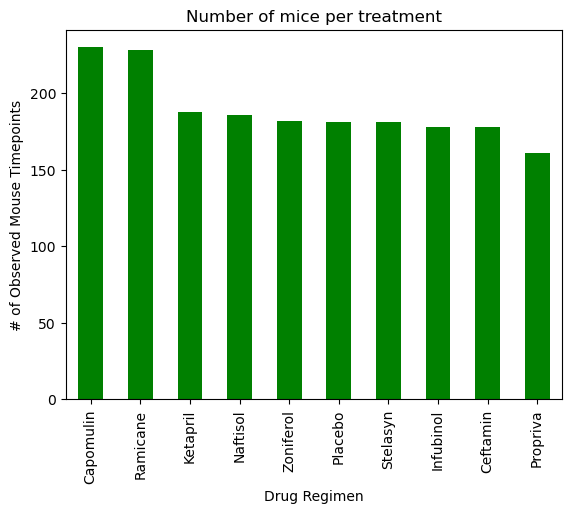

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

plot_pandas = mice_count.plot.bar(color="green")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of mice per treatment")

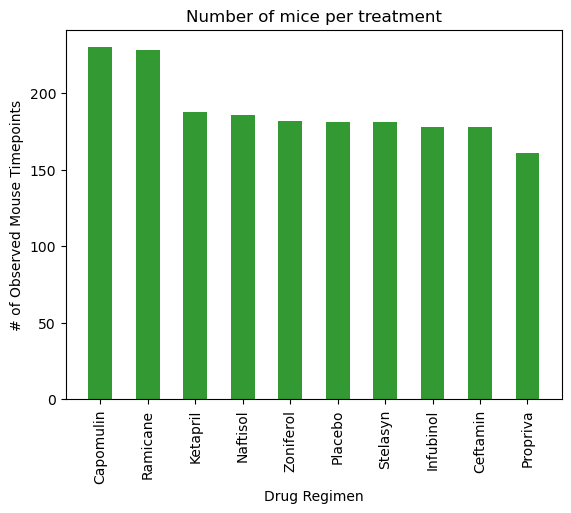

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color="green", alpha=0.8, align="center", width=.5)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of mice per treatment")
plt.xticks(rotation="vertical")

plt.show()

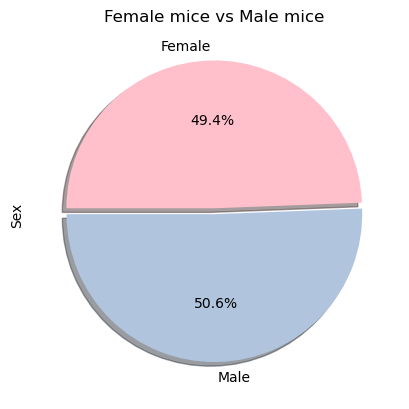

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female mice vs Male mice")
explode=(0,0.04)
gender_data.plot.pie(autopct= "%1.1f%%",colors=("lightsteelblue","pink"), startangle=180,explode=explode,shadow=True)
plt.ylabel("Sex")
plt.show()

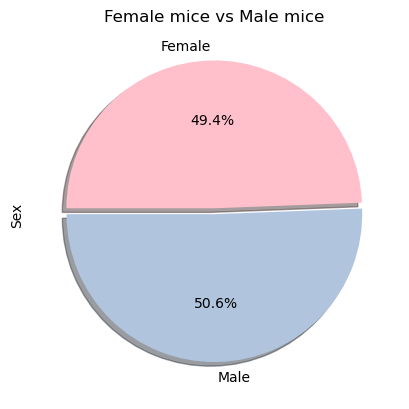

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
plot = gender_data.plot.pie(y="Total Count", autopct="%1.1f%%",colors=("lightsteelblue","pink"), startangle=180,explode=explode,shadow=True)
explode=(0,0.04)
plt.title("Female mice vs Male mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Then, calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens

Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. Highlight any potential outliers in the plot by changing their color and style.

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"]== "Ramicane",:]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"]== "Infubinol",:]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"]== "Ceftamin",:]
# Start by getting the last (greatest) timepoint for each mouse
# Merge thihe original DataFrame to get the tumor volume at the last timepoints group df with t

Capomulin_last = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [17]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles= Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower quartile of Capomulin Tumors:{lowerq}")
print(f"Upper quartile of Capomulin Tumors:{upperq}")
print(f"Interquartile range of Capomulin Tumors:{iqr}")
print(f"Median of Capomulin Tumors:{quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Lower quartile of Capomulin Tumors:32.37735684
Upper quartile of Capomulin Tumors:40.1592203
Interquartile range of Capomulin Tumors:7.781863460000004
Median of Capomulin Tumors:38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [18]:
#Ramicane
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_last = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge= pd.merge(Ramicane_vol, clean_df, on=("Mouse ID", "Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles= Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f" Lower quartile of Ramicane tumors: {lowerq}")
print(f" Upper quartile of Ramicane tumors: {upperq}")
print(f"  Interquartile of Ramicane tumors: {iqr}")
print(f" Median of Ramicane tumors: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


 Lower quartile of Ramicane tumors: 31.56046955
 Upper quartile of Ramicane tumors: 40.65900627
  Interquartile of Ramicane tumors: 9.098536719999998
 Median of Ramicane tumors: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [19]:
#Infubinol  
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()
     

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [20]:
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
Infubinol_merge.to_csv("output.csv")

quartiles= Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f" Lower quartile of Infubinol tumors: {lowerq}")
print(f" Upper quartile of Infubinol tumors: {upperq}")
print(f"  Interquartile of Infubinol tumors: {iqr}")
print(f" Median of Infubinol tumors: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


 Lower quartile of Infubinol tumors: 54.04860769
 Upper quartile of Infubinol tumors: 65.52574285
  Interquartile of Infubinol tumors: 11.477135160000003
 Median of Infubinol tumors: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
#Ceftamin
Ceftamin_last = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()
    

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:

 #quartiles and IQR
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]
Ceftamin_merge.to_csv("output.csv")

quartiles= Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f" Lower quartile of treatment: {lowerq}")
print(f" Upper quartile of temperature: {upperq}")
print(f"  Interquartile range of temperatures: {iqr}")
print(f" Median of Temperatures: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


 Lower quartile of treatment: 48.72207785
 Upper quartile of temperature: 64.29983003
  Interquartile range of temperatures: 15.577752179999997
 Median of Temperatures: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [23]:
#Recalculated: Quartiles, Outliers and Boxplots using for loop
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]
drugs = combined_df[combined_df["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen","Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)



Capomulin
Ramicane
Infubinol
Ceftamin


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

treatment = 0 
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq -(1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if treatment == 0:
        print(f"-------------------------")
    print(f"Lower quartile of {drug} tretaments {lowerq}")
    print(f"upper quartile of {drug} tretaments {upperq}")
    print(f" Interquartile range of {drug} tretaments {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------")
    treatment+=1
    
    

-------------------------
Lower quartile of Capomulin tretaments 32.38
upper quartile of Capomulin tretaments 40.16
 Interquartile range of Capomulin tretaments 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------
Lower quartile of Ramicane tretaments 31.56
upper quartile of Ramicane tretaments 40.66
 Interquartile range of Ramicane tretaments 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------
Lower quartile of Infubinol tretaments 54.05
upper quartile of Infubinol tretaments 65.53
 Interquartile range of Infubinol tretaments 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
------------------------------
Lower quartile of Ceftamin tretaments 48.72
upper quartile of Ceftamin tretaments 64.3
 Interquartile range of Ceftamin tretaments 15.58
Values below 25.35 could be Ceftamin outl

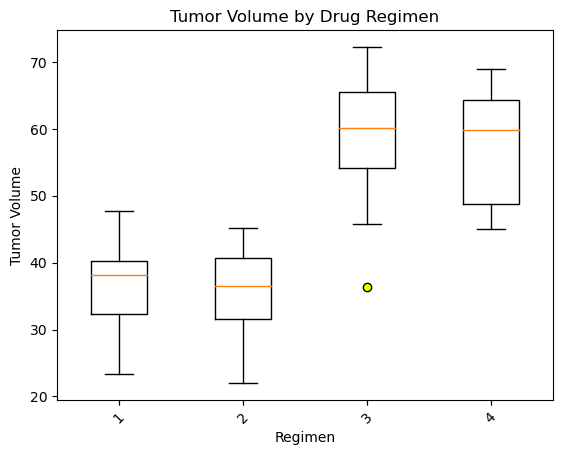

In [56]:
boxplot_list =[]
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))

    
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4],drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
yellow_circle = dict(markerfacecolor = "yellow", marker = "o")
plt.boxplot(boxplot_list,flierprops = yellow_circle)
plt.show()

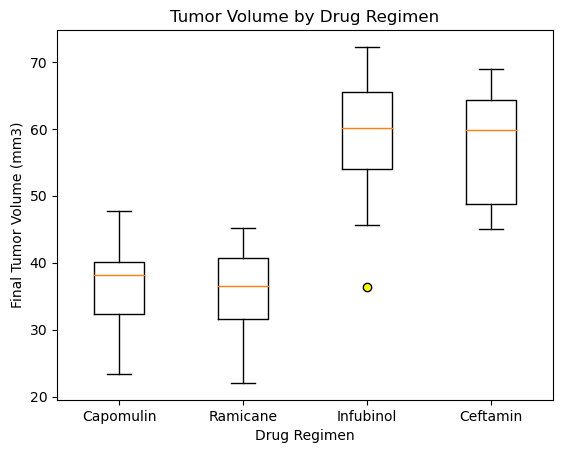

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1,ax1 = plt.subplots()
ax1.set_title("Tumor Volume by Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(data_to_plot, widths =0.4, vert= True, labels=Regimen,flierprops = yellow_circle)
yellow_circle = dict(markerfacecolor = "yellow", marker = "o")

plt.show()

## Line and Scatter Plots

Select a single mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse.

Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen.

Text(0, 0.5, 'Tumor Volume (mm3)')

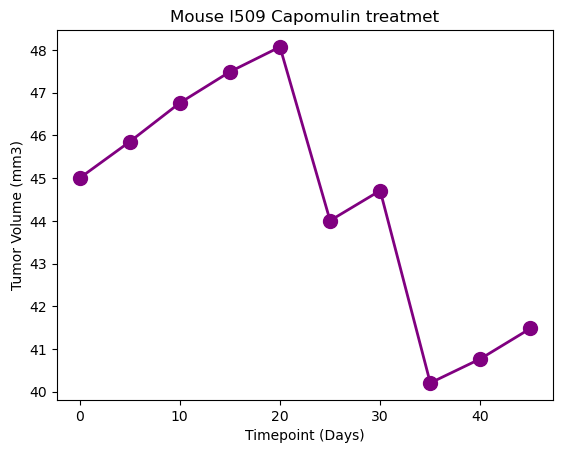

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1,ax1 = plt.subplots()
plt.title("Mouse l509 Capomulin treatmet")
plt.plot(x_axis,tumsiz,linewidth=2, markersize=10, marker="o",color="purple",label="Fahreneit")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")


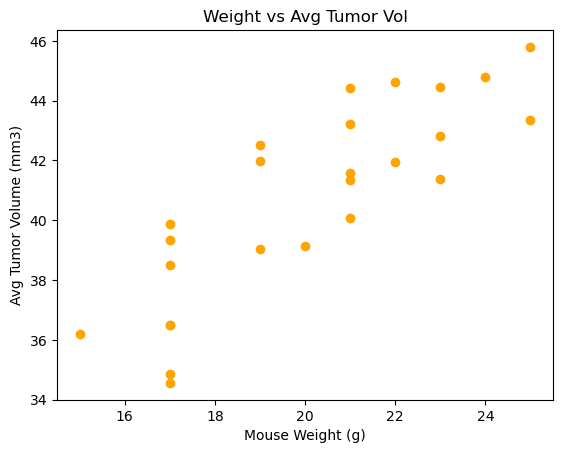

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_capm_vol = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color="orange")
plt.title("Weight vs Avg Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()





## Correlation and Regression

In [44]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")





The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


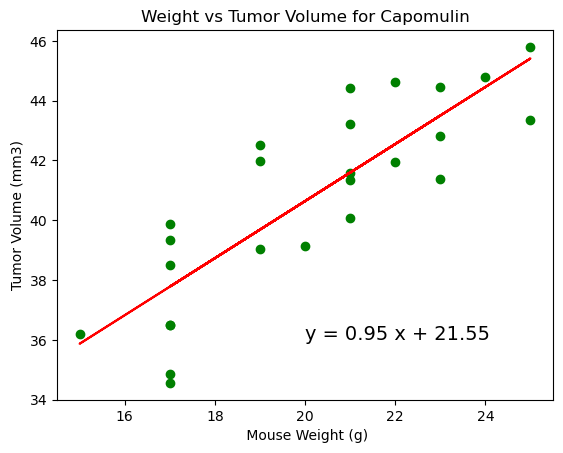

In [54]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
ine_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"


plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='green')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel(" Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()